## 单序列ARIMA

In [39]:
#coding utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import style
style.use('ggplot')   #图画风格
plt.rcParams['font.sans-serif'] = ['SimHei']  #字体风格
plt.rcParams['axes.unicode_minus'] = False    #用来正常显示负号
plt.rcParams['figure.figsize'] = (12,7)       #图像大小

In [34]:
#用2015年的数据
FILE_NAME = '../input/years/2015_year.csv'  
START_POINT = '2015/1/1 0:00:00'     #第一个时刻点
source_df = pd.read_csv(FILE_NAME,index_col=0)   #读入csv文件
index_col = pd.date_range(START_POINT,periods=len(source_df),freq='h')   #产生日期index
source_df = pd.DataFrame(np.array(source_df),index=index_col,columns=source_df.columns) #产生标准日期格式的DataFrame
print("产生的日期格式like this: ",source_df.index[0])
print("dataframe de 第一条记录如下:")
source_df.head(1)

产生的日期格式like this:  2015-01-01 00:00:00
dataframe de 第一条记录如下:


,zhexi_in,xiaoxi_out,lengshuijiang_add,xinhua_add,zhexi_add
2015-01-01,180.475,67.0,0.0,0.0,0.0


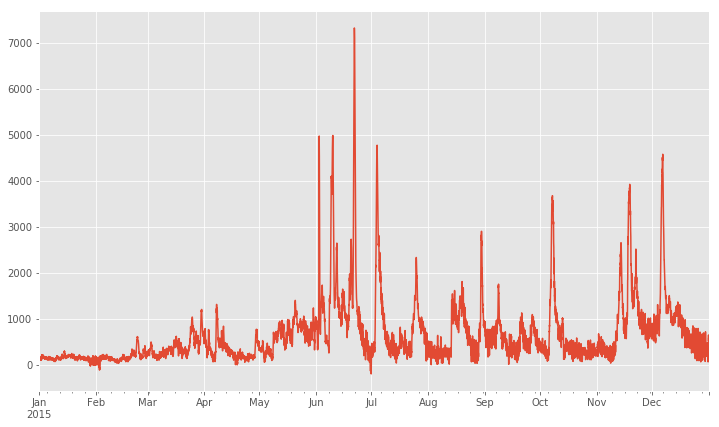

In [38]:
#coding=gbk
#使用ARIMA 模型对非平稳时间序列记性建模操作
#差分运算具有强大的确定性的信息提取能力， 许多非平稳的序列差分后显示出平稳序列的性质， 这是称这个非平稳序列为差分平稳序列。 
#对差分平稳序列可以还是要ARMA 模型进行拟合， ARIMA 模型的实质就是差分预算与 ARMA 模型的结合。 
from statsmodels.tsa.arima_model import ARIMA 

data = source_df['zhexi_in']  #单序列

#画出时序图  
data.plot()
plt.show()

/home/harrison/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


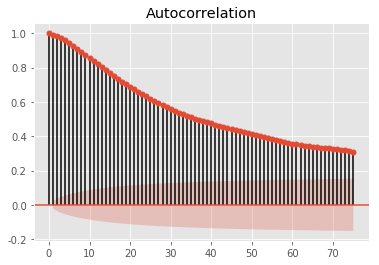

原始序列的检验结果为： (-6.569704347056374, 7.993088583313892e-09, 71, 8688, {'1%': -3.431102904367241, '5%': -2.8618727334103733, '10%': -2.5669471090376983}, 97722.19638453466)


In [4]:
#画出自相关性图
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data,lags=75)
plt.show()

#平稳性检测
from statsmodels.tsa.stattools import adfuller
print('原始序列的检验结果为：',adfuller(data,maxlag=75))

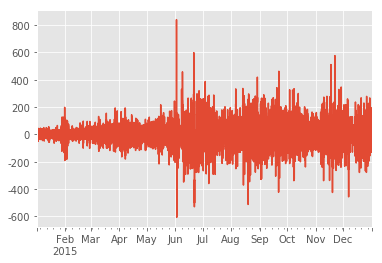

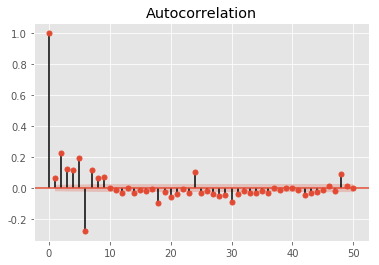

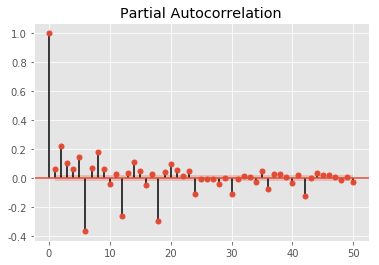

差分序列的ADF 检验结果为：  (-13.532041550482377, 2.6103073216637144e-25, 70, 8688, {'1%': -3.431102904367241, '5%': -2.8618727334103733, '10%': -2.5669471090376983}, 97753.28492695135)


In [5]:
#对数据进行差分后得到 自相关图和 偏相关图
df_data = data.diff().dropna()

df_data.plot()   #画出差分后的时序图
plt.show()

plot_acf(df_data,lags=50)    #画出自相关图
plt.show()
plot_pacf(df_data,lags=50)   #画出偏相关图
plt.show()
print(u'差分序列的ADF 检验结果为： ', adfuller(df_data,maxlag=75))   #平稳性检验

In [6]:
#对一阶差分后的序列做白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果：',acorr_ljungbox(df_data, lags= 48)) #返回统计量和 p 值

差分序列的白噪声检验结果： (array([  33.82866911,  472.7862363 ,  610.86479245,  732.08138369,
       1057.70372873, 1730.35460366, 1855.71941633, 1895.17021485,
       1942.55537435, 1942.59265455, 1943.92393559, 1952.28992622,
       1952.29216141, 1962.50733375, 1964.26555023, 1968.01098534,
       1968.09962531, 2046.34531914, 2052.76231358, 2080.56534755,
       2094.04018552, 2094.78344894, 2103.62934456, 2194.17609007,
       2203.62455446, 2207.01397267, 2219.24035007, 2243.03542188,
       2258.90306324, 2334.22576392, 2348.03564623, 2351.66405933,
       2361.14059055, 2371.97440646, 2375.4760933 , 2383.95118577,
       2383.95920059, 2385.38612619, 2385.41113928, 2385.41344082,
       2386.29273843, 2402.60911994, 2410.45698681, 2416.65338799,
       2418.77240209, 2420.95778444, 2424.02621422, 2495.95597972]), array([6.01853763e-009, 2.16657250e-103, 4.44649232e-132, 3.93787200e-157,
       1.92818919e-226, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.000

In [9]:
#对模型进行定阶
from statsmodels.tsa.arima_model import ARIMA 

#pmax = int(len(df_data) / 10)    
#qmax = int(len(df_data) / 10)
pmax = 5
qmax = 10
bic_matrix = []
for p in range(pmax +1):
    temp= []
    for q in range(qmax+1):
        try:
            bic = ARIMA(data[:1200], (p, 1, q)).fit().bic
            print(bic)
            temp.append(bic)
        except:
            temp.append(None)
    bic_matrix.append(temp)

bic_matrix = pd.DataFrame(bic_matrix)   #将其转换成Dataframe 数据结构
p,q = bic_matrix.stack().idxmin()   #先使用stack 展平， 然后使用 idxmin 找出最小值的位置
print(u'BIC 最小的p值 和 q 值：%s,%s' %(p,q))  #  BIC 最小的p值 和 q 值：0,1

11526.014693536454
11263.334384981506
11247.726873662916
11249.725721312301
11256.814902248136
11164.018385640984
10937.011498931537
10878.86819858322
10873.722014466528
10880.808965248854
11262.671525905009
11251.50848859892
11251.776344093472
11203.610751302778
11210.606176861378
11194.295674242496
10869.25503785573
10875.844143236485
10880.807396155442
10884.702935383988
10890.877686457547
11249.942632909737
11185.509335469314
11192.471887061753
11210.483849488484
11140.990973162576
11078.443596469113
10875.642639171212
10876.66493704746
10884.819865814983
10882.147385639531
10886.799900723532
11257.018893139637
11223.299227202659
11153.871540154278
11166.879024258044
11148.028004970713
11048.503797939864
10879.12954562123
10883.782073957847
10890.057053163453
10893.27875867187
10863.460062433049
BIC 最小的p值 和 q 值：3,10


In [46]:
train_end_point = 1200
predict_len = 10
model = ARIMA(data[:train_end_point], (3,1,10)).fit(disp=0)
print(model.summary2())        #生成一份模型报告
forecast = model.forecast(predict_len)   #为未来10小时进行预测， 返回预测结果， 标准误差， 和置信区间

                           Results: ARIMA
Model:              ARIMA            BIC:                 10863.4601
Dependent Variable: D.zhexi_in       Log-Likelihood:      -5378.6   
Date:               2019-10-17 21:43 Scale:               1.0000    
No. Observations:   1199             Method:              css-mle   
Df Model:           14               Sample:              01-01-2015
Df Residuals:       1185                                  02-19-2015
Converged:          1.0000           S.D. of innovations: 21.433    
No. Iterations:     72.0000          HQIC:                10815.879 
AIC:                10787.1214                                      
--------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                0.0015   0.1122   0.0134 0.9893 -0.2183  0.2213
ar.L1.D.zhexi_in     1.9958   0.1076  18.5443 0.0000  1.7848 

In [43]:
forecast

(array([191.6925652 , 214.36595582, 194.89684544, 171.23356605,
        181.27400424, 186.61152804, 172.763807  , 168.34771391,
        165.10673328, 158.81362919]),
 array([21.43333581, 23.81346372, 27.27600823, 30.67498726, 34.48179308,
        38.48390454, 38.57796524, 39.72465794, 40.46403769, 41.02368968]),
 array([[149.68399894, 233.70113146],
        [167.69242459, 261.03948706],
        [141.43685167, 248.35683922],
        [111.11169579, 231.35543631],
        [113.69093168, 248.8570768 ],
        [111.18446115, 262.03859493],
        [ 97.15238453, 248.37522947],
        [ 90.48881505, 246.20661276],
        [ 85.79867674, 244.41478983],
        [ 78.40867491, 239.21858347]]))

In [44]:
def mape(y_true, y_pred):
    """
    参数:
    y_true -- 测试集目标真实值
    y_pred -- 测试集目标预测值
    
    返回:
    mape -- MAPE 评价指标
    """
    
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape

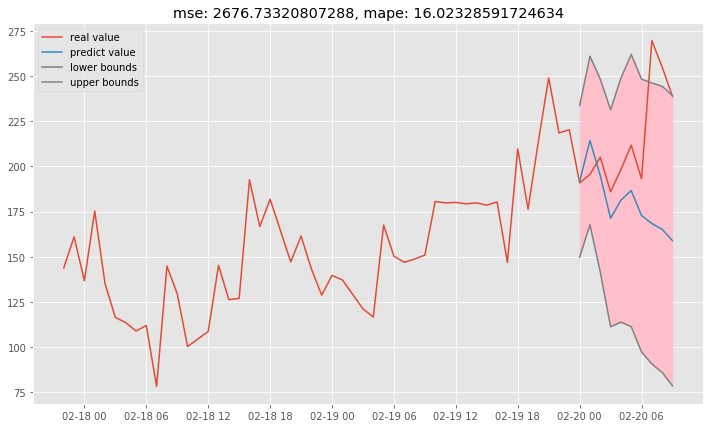

In [48]:
from sklearn.metrics import mean_squared_error as mse
index = pd.date_range(start=data.index[train_end_point],periods=len(forecast[0]),freq='h')
plt.plot(data[train_end_point-50:train_end_point+len(forecast[0])])
plt.plot(index,forecast[0])

lower_values = [i[0] for i in forecast[2]]
upper_values = [i[1] for i in forecast[2]]
plt.plot(index,lower_values,color='gray')
plt.plot(index,upper_values,color='gray')
plt.fill_between(index,lower_values,upper_values,color='pink')
plt.legend(('real value','predict value','lower bounds','upper bounds'))
y_true = data[train_end_point:train_end_point+predict_len]
y_pred = forecast[0]
mse = mse(y_true,y_pred)
mape = mape(y_true,y_pred)
plt.title(f'mse: {mse}, mape: {mape}')
plt.show()